In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

Read and Pre-process data

In [2]:
imdb_data = pd.read_csv('imdb_top_1000_cleaned.csv')

imdb_data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
imdb_data.shape

(831, 15)

In [4]:
imdb_data.isna().sum()

Series_Title      0
Released_Year     0
Certificate      46
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score       81
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64

In [5]:
imdb_data.dropna(inplace = True)

In [6]:
imdb_data

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.60,A low-life bandit and an I.R.A. explosives exp...,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
827,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.60,A group of U.S. soldiers sneaks across enemy l...,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
828,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.60,Bagheera the Panther and Baloo the Bear have a...,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
829,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.60,"Over two ""typical"" days in the life of The Bea...",96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [7]:
imdb_data = imdb_data.reset_index()

In [8]:
imdb_data

,index,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,826,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.60,A low-life bandit and an I.R.A. explosives exp...,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
710,827,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.60,A group of U.S. soldiers sneaks across enemy l...,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
711,828,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.60,Bagheera the Panther and Baloo the Bear have a...,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
712,829,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.60,"Over two ""typical"" days in the life of The Bea...",96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [9]:
imdb_data.drop(columns=['index', 'Overview'], inplace = True)

In [10]:
imdb_data

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.60,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
710,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.60,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
711,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.60,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
712,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.60,96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [11]:
imdb_data['Gross'] = imdb_data['Gross'].str.replace(',', '').astype(int)

In [12]:
imdb_data['Runtime'] = imdb_data['Runtime'].str.replace(' min', '').astype(int)

In [13]:
imdb_data.dtypes

Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int64
dtype: object

In [14]:
categorical_columns = imdb_data.select_dtypes(include=['object']).columns 
print("Categorical columns after excluding the dependent column:", categorical_columns)

Categorical columns after excluding the dependent column: Index(['Series_Title', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4'],
      dtype='object')


In [15]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

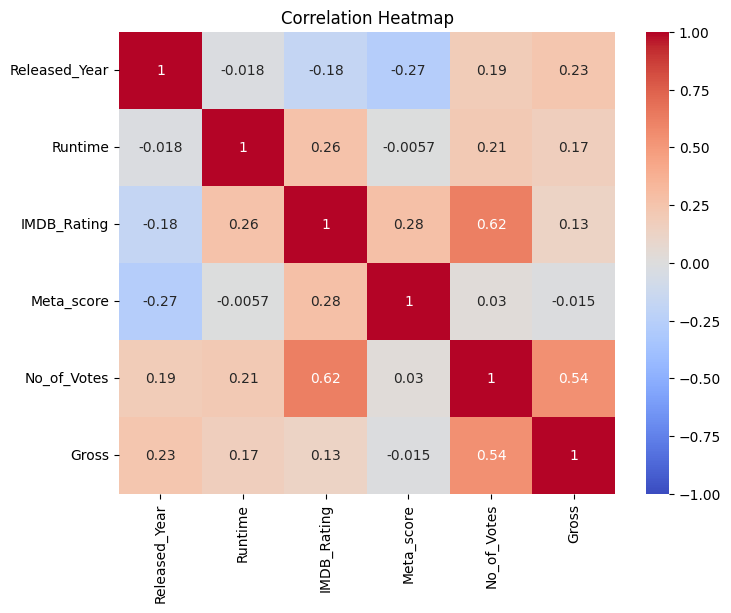

In [16]:
correl = imdb_data.drop(columns=categorical_columns).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correl, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
numerical_columns = imdb_data.drop(columns=categorical_columns)
rating_columns = imdb_data[['IMDB_Rating', 'Meta_score']]

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
subset_data = pd.DataFrame(sc.fit_transform(numerical_columns), columns = numerical_columns.columns, index = numerical_columns.index)

In [19]:
subset_data

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,-0.09,0.71,4.65,0.23,5.62,-0.44
1,-1.28,1.98,4.31,1.84,3.57,0.49
2,0.66,1.09,3.63,0.55,5.51,3.97
3,-1.17,3.03,3.63,1.04,2.19,-0.18
4,-2.09,-1.07,3.63,1.52,0.94,-0.65
...,...,...,...,...,...,...
709,-1.33,1.29,-1.15,-0.01,-0.92,-0.68
710,-1.39,0.78,-1.15,-2.19,-0.88,-0.67
711,-1.55,-1.77,-1.15,-0.98,-0.54,0.55
712,-1.71,-1.42,-1.15,1.52,-0.89,-0.56


In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 6, 
           init = 'k-means++', 
           n_init = 10, 
           max_iter = 500, 
           # tol = 1e-04, 
           random_state = 50)
data_km = pd.DataFrame(km.fit_predict(subset_data), index = subset_data.index)

In [21]:
data_km.rename(columns = {0:'cluster'}, inplace = True)
data_km = data_km.merge(numerical_columns, left_index = True, right_index = True)
data_km.head()

,cluster,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,2,1994,142,9.30,80.00,2343110,28341469
1,2,1972,175,9.20,100.00,1620367,134966411
2,2,2008,152,9.00,84.00,2303232,534858444
3,2,1974,202,9.00,90.00,1129952,57300000
4,2,1957,96,9.00,96.00,689845,4360000


In [22]:
data_km.loc[data_km['Meta_score'] < 60]

,cluster,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
24,2,1997,116,8.60,59.00,623629,57598247
29,4,2019,122,8.50,59.00,939252,335451311
31,2,2011,112,8.50,57.00,760360,13182281
75,0,2000,104,8.30,55.00,782001,30328156
87,2,1983,131,8.30,58.00,950470,309125409
168,3,1998,169,8.10,58.00,59020,259127
185,0,1982,109,8.10,57.00,371271,13782838
186,0,1982,95,8.10,47.00,76081,22244207
218,0,2018,134,8.00,49.00,450349,216428042
225,0,2010,165,8.00,50.00,98575,4018695


In [23]:
data_km.loc[data_km['Meta_score'] == 100]

,cluster,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
1,2,1972,175,9.20,100.00,1620367,134966411
45,5,1942,102,8.50,100.00,522093,1024560
67,5,1954,112,8.40,100.00,444074,36764313
94,3,1962,228,8.30,100.00,268085,44824144
97,5,1958,128,8.30,100.00,364368,3200000
100,5,1941,119,8.30,100.00,403351,1585634
176,1,1994,99,8.10,100.00,90729,4043686
187,3,1982,188,8.10,100.00,57784,4971340
285,5,1970,113,8.00,100.00,27067,541940
327,3,2014,165,7.90,100.00,335533,25379975


In [24]:
data_km.loc[data_km['Meta_score'] == 100]

,cluster,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
1,2,1972,175,9.20,100.00,1620367,134966411
45,5,1942,102,8.50,100.00,522093,1024560
67,5,1954,112,8.40,100.00,444074,36764313
94,3,1962,228,8.30,100.00,268085,44824144
97,5,1958,128,8.30,100.00,364368,3200000
100,5,1941,119,8.30,100.00,403351,1585634
176,1,1994,99,8.10,100.00,90729,4043686
187,3,1982,188,8.10,100.00,57784,4971340
285,5,1970,113,8.00,100.00,27067,541940
327,3,2014,165,7.90,100.00,335533,25379975


In [25]:
data_km.loc[data_km['Meta_score'] == 100]

,cluster,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
1,2,1972,175,9.20,100.00,1620367,134966411
45,5,1942,102,8.50,100.00,522093,1024560
67,5,1954,112,8.40,100.00,444074,36764313
94,3,1962,228,8.30,100.00,268085,44824144
97,5,1958,128,8.30,100.00,364368,3200000
100,5,1941,119,8.30,100.00,403351,1585634
176,1,1994,99,8.10,100.00,90729,4043686
187,3,1982,188,8.10,100.00,57784,4971340
285,5,1970,113,8.00,100.00,27067,541940
327,3,2014,165,7.90,100.00,335533,25379975


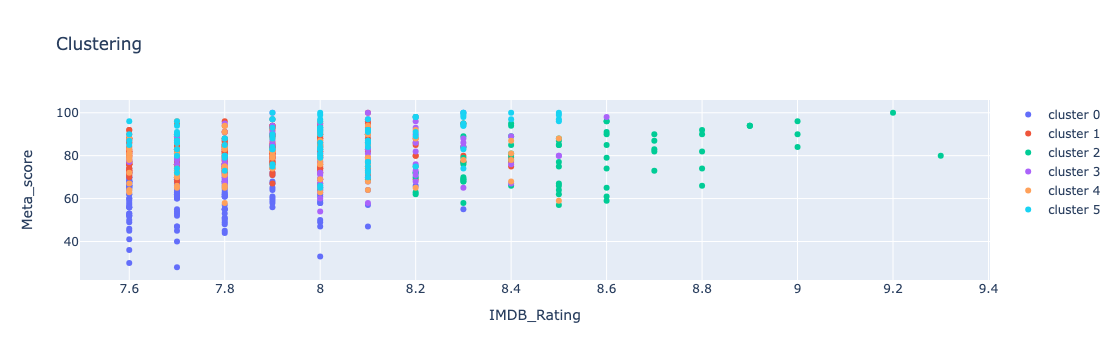

In [26]:
plot_data = []
for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x= df['IMDB_Rating'], y= df['Meta_score'], name = 'cluster ' + str(clus), mode = 'markers'))

layout = go.Layout(xaxis = dict(title='IMDB_Rating'), yaxis = dict(title= 'Meta_score'), 
                   title = 'Clustering')

fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)

KMeans(max_iter=500, n_clusters=1, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=2, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=3, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=4, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=5, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=6, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=7, n_init=10, random_state=50)

KMeans(max_iter=500, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=9, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=10, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=12, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=13, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=14, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=15, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=16, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=17, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=18, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=19, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=20, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=21, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=22, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=23, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=24, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=25, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=26, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=27, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=28, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=29, n_init=10, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

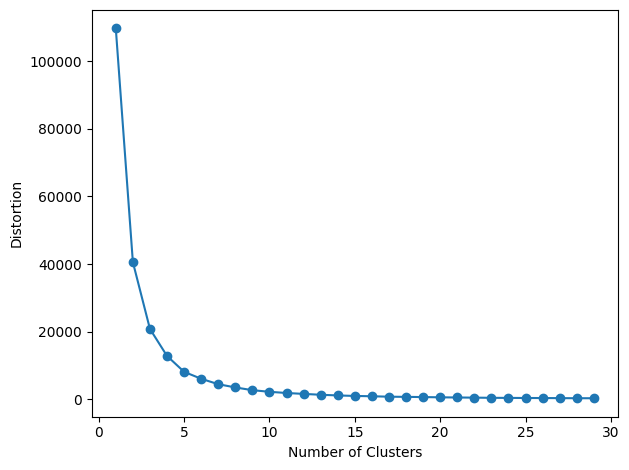

In [27]:
distortions = []
for i in range(1, 30): 
    km = KMeans(n_clusters = i, 
           init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
           n_init = 10, 
           max_iter = 500, 
           # tol = 1e-04, 
           random_state = 50)
    km.fit(rating_columns)
    distortions.append(km.inertia_)
plt.plot(range(1,30), distortions, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

KMeans(max_iter=500, n_clusters=1, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=2, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=3, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=4, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=5, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=6, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=7, n_init=10, random_state=50)

KMeans(max_iter=500, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=9, n_init=10, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

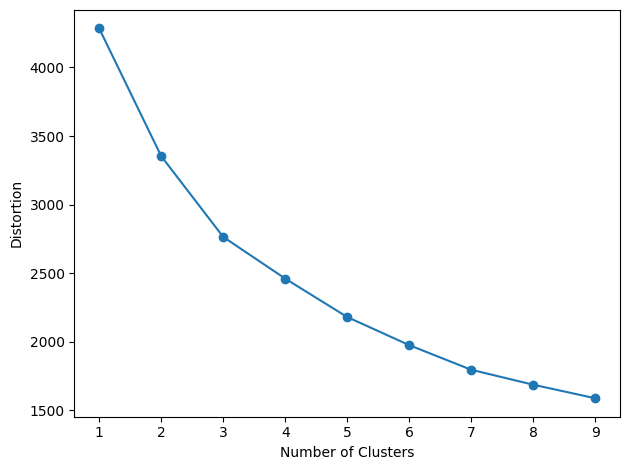

In [28]:
distortions = []
for i in range(1, 10): 
    km = KMeans(n_clusters = i, 
           init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
           n_init = 10, 
           max_iter = 500, 
           # tol = 1e-04, 
           random_state = 50)
    km.fit(subset_data)
    distortions.append(km.inertia_)
plt.plot(range(1,10), distortions, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
# Now let us try by not prescribing number of clusters (the distance hreshold is crucial, selecting 5.0 gives 6 clusters)
ac = AgglomerativeClustering(n_clusters = None,  
                             distance_threshold = 8.0, 
          
           linkage = 'complete')
data_ac = pd.DataFrame(ac.fit_predict(subset_data), index = subset_data.index)
data_ac.head()
data_ac.rename(columns = {0:'cluster'}, inplace = True)
# data_ac = data_ac.merge(airbnb_data[['latitude', 'longitude']], left_index = True, right_index = True)
# If we use the above, we would get the actual latitude used in the data as opposed to the scaled one with below
# But scaled is what we have for the cetroids, so using it
data_ac = data_ac.merge(numerical_columns, left_index = True, right_index = True)
data_ac.head()

,0
0,2
1,2
2,2
3,2
4,1


,cluster,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,2,1994,142,9.30,80.00,2343110,28341469
1,2,1972,175,9.20,100.00,1620367,134966411
2,2,2008,152,9.00,84.00,2303232,534858444
3,2,1974,202,9.00,90.00,1129952,57300000
4,1,1957,96,9.00,96.00,689845,4360000


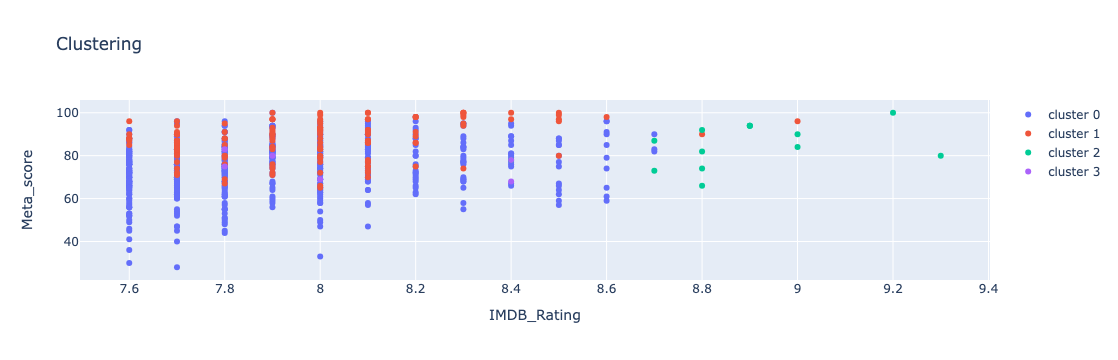

In [30]:
plot_data = []
for clus in set(data_ac['cluster']):
    df = data_ac[data_ac['cluster'] == clus]
    plot_data.append(go.Scatter(x= df['IMDB_Rating'], y= df['Meta_score'], 
                                # text=df["name"], 
                                name = 'cluster ' + str(clus), mode = 'markers'))

layout = go.Layout(xaxis = dict(title='IMDB_Rating'), yaxis = dict(title= 'Meta_score'), 
                   title = 'Clustering')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)

In [31]:
z=data_ac[data_ac['cluster']==3]
z

,cluster,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
51,3,2019,181,8.40,78.00,809955,858373000
52,3,2018,149,8.40,68.00,834477,678815482
229,3,2012,143,8.00,69.00,1260806,623279547
315,3,2015,138,7.90,80.00,860823,936662225
416,3,2009,162,7.80,83.00,1118998,760507625
443,3,1997,194,7.80,75.00,1046089,659325379


In [32]:
imdb_data

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Giù la testa,1971,PG,157,"Drama, War, Western",7.60,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
710,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.60,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
711,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.60,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
712,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.60,96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


In [33]:
top_movie_data=imdb_data[imdb_data['IMDB_Rating']>8.3]

In [34]:
top_movie_data

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,The Shining,1980,A,146,"Drama, Horror",8.40,66.00,Stanley Kubrick,Jack Nicholson,Shelley Duvall,Danny Lloyd,Scatman Crothers,898237,44017374
64,Apocalypse Now,1979,R,147,"Drama, Mystery, War",8.40,94.00,Francis Ford Coppola,Martin Sheen,Marlon Brando,Robert Duvall,Frederic Forrest,606398,83471511
65,Alien,1979,R,117,"Horror, Sci-Fi",8.40,89.00,Ridley Scott,Sigourney Weaver,Tom Skerritt,John Hurt,Veronica Cartwright,787806,78900000
66,Dr. Strangelove or: How I Learned to Stop Worr...,1964,A,95,Comedy,8.40,97.00,Stanley Kubrick,Peter Sellers,George C. Scott,Sterling Hayden,Keenan Wynn,450474,275902


In [35]:
top_movie_data_numeric=top_movie_data[['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes', 'Gross']]
top_movie_data_rating=top_movie_data[['IMDB_Rating', 'Meta_score']]

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
top_scaled_data_numeric = pd.DataFrame(sc.fit_transform(top_movie_data_numeric), columns = top_movie_data_numeric.columns, index = top_movie_data_numeric.index)
top_scaled_data_numeric

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,0.07,0.17,3.51,-0.20,2.61,-0.65
1,-0.99,1.28,3.02,1.52,1.23,-0.03
2,0.75,0.51,2.03,0.14,2.53,2.31
3,-0.89,2.18,2.03,0.66,0.30,-0.49
4,-1.72,-1.37,2.03,1.17,-0.53,-0.79
...,...,...,...,...,...,...
63,-0.60,0.30,-0.91,-1.40,-0.14,-0.56
64,-0.65,0.34,-0.91,1.00,-0.69,-0.33
65,-0.65,-0.67,-0.91,0.57,-0.35,-0.36
66,-1.38,-1.41,-0.91,1.26,-0.99,-0.82


In [37]:
km = KMeans(n_clusters = 6, 
        init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
        n_init = 10, 
        max_iter = 500, 
        # tol = 1e-04, 
        random_state = 50)
data_km = pd.DataFrame(km.fit_predict(top_scaled_data_numeric), index = top_scaled_data_numeric.index)

In [38]:
data_km.rename(columns = {0:'cluster'}, inplace = True)
# data_ac = data_ac.merge(airbnb_data[['latitude', 'longitude']], left_index = True, right_index = True)
# If we use the above, we would get the actual latitude used in the data as opposed to the scaled one with below
# But scaled is what we have for the cetroids, so using it
data_km = data_km.merge(top_movie_data, left_index = True, right_index = True)
data_km

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,3,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,3,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,3,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,2,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,4,The Shining,1980,A,146,"Drama, Horror",8.40,66.00,Stanley Kubrick,Jack Nicholson,Shelley Duvall,Danny Lloyd,Scatman Crothers,898237,44017374
64,5,Apocalypse Now,1979,R,147,"Drama, Mystery, War",8.40,94.00,Francis Ford Coppola,Martin Sheen,Marlon Brando,Robert Duvall,Frederic Forrest,606398,83471511
65,1,Alien,1979,R,117,"Horror, Sci-Fi",8.40,89.00,Ridley Scott,Sigourney Weaver,Tom Skerritt,John Hurt,Veronica Cartwright,787806,78900000
66,2,Dr. Strangelove or: How I Learned to Stop Worr...,1964,A,95,Comedy,8.40,97.00,Stanley Kubrick,Peter Sellers,George C. Scott,Sterling Hayden,Keenan Wynn,450474,275902


In [39]:
data_km[data_km['Series_Title']=='Star Wars']
data_km[data_km['Series_Title']=='The Departed']
data_km[data_km['Series_Title']=='Alien']
data_km[data_km['Series_Title']=='Coco']

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
27,1,Star Wars,1977,UA,121,"Action, Adventure, Fantasy",8.60,90.00,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness,1231473,322740140


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
33,1,The Departed,2006,A,151,"Crime, Drama, Thriller",8.50,85.00,Martin Scorsese,Leonardo DiCaprio,Matt Damon,Jack Nicholson,Mark Wahlberg,1189773,132384315


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
65,1,Alien,1979,R,117,"Horror, Sci-Fi",8.40,89.00,Ridley Scott,Sigourney Weaver,Tom Skerritt,John Hurt,Veronica Cartwright,787806,78900000


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
53,5,Coco,2017,U,105,"Animation, Adventure, Family",8.40,81.00,Lee Unkrich,Adrian Molina,Anthony Gonzalez,Gael García Bernal,Benjamin Bratt,384171,209726015


In [40]:
data_km[data_km['Series_Title']=='Interstellar']
data_km[data_km['Series_Title']=='Fight Club']
data_km[data_km['Series_Title']=='The Prestige']
data_km[data_km['Series_Title']=='Joker']

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
19,4,Interstellar,2014,UA,169,"Adventure, Drama, Sci-Fi",8.60,74.00,Christopher Nolan,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,1512360,188020017


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
9,4,Fight Club,1999,A,139,Drama,8.80,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
32,4,The Prestige,2006,U,130,"Drama, Mystery, Sci-Fi",8.50,66.00,Christopher Nolan,Christian Bale,Hugh Jackman,Scarlett Johansson,Michael Caine,1190259,53089891


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
29,4,Joker,2019,A,122,"Crime, Drama, Thriller",8.50,59.00,Todd Phillips,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,939252,335451311


In [41]:
data_km[data_km['Star1']=='Tom Hanks']

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
11,3,Forrest Gump,1994,UA,142,"Drama, Romance",8.80,82.00,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,330252182
22,1,Saving Private Ryan,1998,R,169,"Drama, War",8.60,91.00,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,1235804,216540909
23,4,The Green Mile,1999,A,189,"Crime, Drama, Fantasy",8.60,61.00,Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,1147794,136801374


In [42]:
data_km[data_km['Director']=='Alfred Hitchcock']

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
44,2,Psycho,1960,A,109,"Horror, Mystery, Thriller",8.50,97.00,Alfred Hitchcock,Anthony Perkins,Janet Leigh,Vera Miles,John Gavin,604211,32000000
67,2,Rear Window,1954,U,112,"Mystery, Thriller",8.40,100.00,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,444074,36764313


In [43]:
data_km[data_km['cluster']==4]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
9,4,Fight Club,1999,A,139,Drama,8.80,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102
14,4,The Matrix,1999,A,136,"Action, Sci-Fi",8.70,73.00,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,1676426,171479930
19,4,Interstellar,2014,UA,169,"Adventure, Drama, Sci-Fi",8.60,74.00,Christopher Nolan,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,1512360,188020017
23,4,The Green Mile,1999,A,189,"Crime, Drama, Fantasy",8.60,61.00,Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,1147794,136801374
24,4,La vita è bella,1997,U,116,"Comedy, Drama, Romance",8.60,59.00,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,623629,57598247
25,4,Se7en,1995,A,127,"Crime, Drama, Mystery",8.60,65.00,David Fincher,Morgan Freeman,Brad Pitt,Kevin Spacey,Andrew Kevin Walker,1445096,100125643
29,4,Joker,2019,A,122,"Crime, Drama, Thriller",8.50,59.00,Todd Phillips,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,939252,335451311
31,4,The Intouchables,2011,UA,112,"Biography, Comedy, Drama",8.50,57.00,Olivier Nakache,Éric Toledano,François Cluzet,Omar Sy,Anne Le Ny,760360,13182281
32,4,The Prestige,2006,U,130,"Drama, Mystery, Sci-Fi",8.50,66.00,Christopher Nolan,Christian Bale,Hugh Jackman,Scarlett Johansson,Michael Caine,1190259,53089891
35,4,Gladiator,2000,UA,155,"Action, Adventure, Drama",8.50,67.00,Ridley Scott,Russell Crowe,Joaquin Phoenix,Connie Nielsen,Oliver Reed,1341460,187705427


In [44]:
drama_data=imdb_data[imdb_data['Genre']=='Drama']

In [45]:
drama_data.shape

(58, 14)

In [46]:
drama_data_numeric=drama_data[['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes', 'Gross','Certificate']]

In [47]:
drama_data_numeric = pd.get_dummies(drama_data_numeric)
drama_data_numeric

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Certificate_A,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_U,Certificate_UA
0,1994,142,9.30,80.00,2343110,28341469,True,False,False,False,False,False
9,1999,139,8.80,66.00,1854740,37030102,True,False,False,False,False,False
17,1975,133,8.70,83.00,918088,112000000,True,False,False,False,False,False
36,1998,119,8.50,62.00,1034705,6719864,False,False,False,True,False,False
48,2018,126,8.40,75.00,62635,1661096,True,False,False,False,False,False
69,2012,115,8.30,77.00,281623,687185,False,False,False,True,False,False
70,2011,123,8.30,95.00,220002,7098492,False,True,False,False,False,False
76,2000,102,8.30,68.00,766870,3635482,True,False,False,False,False,False
77,1999,122,8.30,84.00,1069738,130096601,False,False,False,False,False,True
109,2007,158,8.20,93.00,517359,40222514,True,False,False,False,False,False


In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data_numeric = pd.DataFrame(sc.fit_transform(drama_data_numeric), columns = drama_data_numeric.columns, index = drama_data_numeric.index)
scaled_data_numeric

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Certificate_A,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_U,Certificate_UA
0,-0.21,0.72,4.06,0.20,4.82,-0.14,1.69,-0.37,-0.13,-0.67,-0.34,-0.48
9,0.10,0.58,2.56,-0.81,3.68,0.05,1.69,-0.37,-0.13,-0.67,-0.34,-0.48
17,-1.38,0.31,2.26,0.41,1.50,1.70,1.69,-0.37,-0.13,-0.67,-0.34,-0.48
36,0.04,-0.34,1.66,-1.09,1.77,-0.61,-0.59,-0.37,-0.13,1.49,-0.34,-0.48
48,1.28,-0.02,1.35,-0.16,-0.50,-0.72,1.69,-0.37,-0.13,-0.67,-0.34,-0.48
69,0.91,-0.52,1.05,-0.02,0.01,-0.74,-0.59,-0.37,-0.13,1.49,-0.34,-0.48
70,0.85,-0.15,1.05,1.27,-0.13,-0.60,-0.59,2.70,-0.13,-0.67,-0.34,-0.48
76,0.17,-1.12,1.05,-0.66,1.14,-0.68,1.69,-0.37,-0.13,-0.67,-0.34,-0.48
77,0.10,-0.20,1.05,0.48,1.85,2.10,-0.59,-0.37,-0.13,-0.67,-0.34,2.07
109,0.60,1.46,0.75,1.13,0.56,0.12,1.69,-0.37,-0.13,-0.67,-0.34,-0.48


In [49]:
km = KMeans(n_clusters = 3, 
        init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
        n_init = 10, 
        max_iter = 500, 
        # tol = 1e-04, 
        random_state = 50)
data_km = pd.DataFrame(km.fit_predict(scaled_data_numeric), index = scaled_data_numeric.index)

In [50]:
data_km.rename(columns = {0:'cluster'}, inplace = True)
# data_ac = data_ac.merge(airbnb_data[['latitude', 'longitude']], left_index = True, right_index = True)
# If we use the above, we would get the actual latitude used in the data as opposed to the scaled one with below
# But scaled is what we have for the cetroids, so using it
data_km = data_km.merge(drama_data, left_index = True, right_index = True)
data_km

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,2,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
9,2,Fight Club,1999,A,139,Drama,8.80,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102
17,2,One Flew Over the Cuckoo's Nest,1975,A,133,Drama,8.70,83.00,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,918088,112000000
36,1,American History X,1998,R,119,Drama,8.50,62.00,Tony Kaye,Edward Norton,Edward Furlong,Beverly D'Angelo,Jennifer Lien,1034705,6719864
48,2,Capharnaüm,2018,A,126,Drama,8.40,75.00,Nadine Labaki,Zain Al Rafeea,Yordanos Shiferaw,Boluwatife Treasure Bankole,Kawsar Al Haddad,62635,1661096
69,1,Jagten,2012,R,115,Drama,8.30,77.00,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Annika Wedderkopp,Lasse Fogelstrøm,281623,687185
70,1,Jodaeiye Nader az Simin,2011,PG-13,123,Drama,8.30,95.00,Asghar Farhadi,Payman Maadi,Leila Hatami,Sareh Bayat,Shahab Hosseini,220002,7098492
76,2,Requiem for a Dream,2000,A,102,Drama,8.30,68.00,Darren Aronofsky,Ellen Burstyn,Jared Leto,Jennifer Connelly,Marlon Wayans,766870,3635482
77,0,American Beauty,1999,UA,122,Drama,8.30,84.00,Sam Mendes,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,1069738,130096601
109,2,There Will Be Blood,2007,A,158,Drama,8.20,93.00,Paul Thomas Anderson,Daniel Day-Lewis,Paul Dano,Ciarán Hinds,Martin Stringer,517359,40222514


In [51]:
data_km[data_km['Series_Title']=='The Color Purple']
data_km[data_km['Series_Title']=='The Help']
data_km[data_km['Series_Title']=='Rain Man']
data_km[data_km['Series_Title']=='Fight Club']

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
467,2,The Color Purple,1985,U,154,Drama,7.80,78.00,Steven Spielberg,Danny Glover,Whoopi Goldberg,Oprah Winfrey,Margaret Avery,78321,98467863


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
222,0,The Help,2011,UA,146,Drama,8.00,62.00,Tate Taylor,Emma Stone,Viola Davis,Octavia Spencer,Bryce Dallas Howard,428521,169708112


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
270,2,Rain Man,1988,U,133,Drama,8.00,65.00,Barry Levinson,Dustin Hoffman,Tom Cruise,Valeria Golino,Gerald R. Molen,473064,178800000


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
9,2,Fight Club,1999,A,139,Drama,8.80,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102


In [52]:
data_km[data_km['cluster']==0]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
77,0,American Beauty,1999,UA,122,Drama,8.30,84.00,Sam Mendes,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,1069738,130096601
222,0,The Help,2011,UA,146,Drama,8.00,62.00,Tate Taylor,Emma Stone,Viola Davis,Octavia Spencer,Bryce Dallas Howard,428521,169708112
225,0,My Name Is Khan,2010,UA,165,Drama,8.00,50.00,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon,Katie A. Keane,98575,4018695
264,0,Scent of a Woman,1992,UA,156,Drama,8.00,59.00,Martin Brest,Al Pacino,Chris O'Donnell,James Rebhorn,Gabrielle Anwar,263918,63895607
285,0,Il conformista,1970,UA,113,Drama,8.00,100.00,Bernardo Bertolucci,Jean-Louis Trintignant,Stefania Sandrelli,Gastone Moschin,Enzo Tarascio,27067,541940
306,0,"I, Daniel Blake",2016,UA,100,Drama,7.90,78.00,Ken Loach,Laura Obiols,Dave Johns,Hayley Squires,Sharon Percy,53818,258168
379,0,Forushande,2016,UA,124,Drama,7.80,85.00,Asghar Farhadi,Shahab Hosseini,Taraneh Alidoosti,Babak Karimi,Mina Sadati,51240,2402067
384,0,Manchester by the Sea,2016,UA,137,Drama,7.80,96.00,Kenneth Lonergan,Casey Affleck,Michelle Williams,Kyle Chandler,Lucas Hedges,246963,47695120
570,0,Philadelphia,1993,UA,125,Drama,7.70,66.00,Jonathan Demme,Tom Hanks,Denzel Washington,Roberta Maxwell,Buzz Kilman,224169,77324422
641,0,Seven Pounds,2008,UA,123,Drama,7.60,36.00,Gabriele Muccino,Will Smith,Rosario Dawson,Woody Harrelson,Michael Ealy,286770,69951824


In [53]:
data_km[data_km['cluster']==1]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
36,1,American History X,1998,R,119,Drama,8.50,62.00,Tony Kaye,Edward Norton,Edward Furlong,Beverly D'Angelo,Jennifer Lien,1034705,6719864
69,1,Jagten,2012,R,115,Drama,8.30,77.00,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Annika Wedderkopp,Lasse Fogelstrøm,281623,687185
70,1,Jodaeiye Nader az Simin,2011,PG-13,123,Drama,8.30,95.00,Asghar Farhadi,Payman Maadi,Leila Hatami,Sareh Bayat,Shahab Hosseini,220002,7098492
135,1,Mommy,2014,R,139,Drama,8.10,74.00,Xavier Dolan,Anne Dorval,Antoine Olivier Pilon,Suzanne Clément,Patrick Huard,50700,3492754
150,1,Gran Torino,2008,R,116,Drama,8.10,72.00,Clint Eastwood,Clint Eastwood,Bee Vang,Christopher Carley,Ahney Her,720450,148095302
212,1,Short Term 12,2013,R,96,Drama,8.00,82.00,Destin Daniel Cretton,Brie Larson,Frantz Turner,John Gallagher Jr.,Kaitlyn Dever,81770,1010414
251,1,Magnolia,1999,R,188,Drama,8.00,77.00,Paul Thomas Anderson,Tom Cruise,Jason Robards,Julianne Moore,Philip Seymour Hoffman,289742,22455976
254,1,Festen,1998,R,105,Drama,8.00,82.00,Thomas Vinterberg,Ulrich Thomsen,Henning Moritzen,Thomas Bo Larsen,Paprika Steen,78341,1647780
255,1,Central do Brasil,1998,R,110,Drama,8.00,80.00,Walter Salles,Fernanda Montenegro,Vinícius de Oliveira,Marília Pêra,Soia Lira,36419,5595428
257,1,Sling Blade,1996,R,135,Drama,8.00,84.00,Billy Bob Thornton,Billy Bob Thornton,Dwight Yoakam,J.T. Walsh,John Ritter,86838,24475416


In [54]:
data_km[data_km['cluster']==2]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,2,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
9,2,Fight Club,1999,A,139,Drama,8.80,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102
17,2,One Flew Over the Cuckoo's Nest,1975,A,133,Drama,8.70,83.00,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,918088,112000000
48,2,Capharnaüm,2018,A,126,Drama,8.40,75.00,Nadine Labaki,Zain Al Rafeea,Yordanos Shiferaw,Boluwatife Treasure Bankole,Kawsar Al Haddad,62635,1661096
76,2,Requiem for a Dream,2000,A,102,Drama,8.30,68.00,Darren Aronofsky,Ellen Burstyn,Jared Leto,Jennifer Connelly,Marlon Wayans,766870,3635482
109,2,There Will Be Blood,2007,A,158,Drama,8.20,93.00,Paul Thomas Anderson,Daniel Day-Lewis,Paul Dano,Ciarán Hinds,Martin Stringer,517359,40222514
131,2,All About Eve,1950,Passed,138,Drama,8.20,98.00,Joseph L. Mankiewicz,Bette Davis,Anne Baxter,George Sanders,Celeste Holm,120539,10177
173,2,Trainspotting,1996,A,93,Drama,8.10,83.00,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd,634716,16501785
183,2,"Paris, Texas",1984,U,145,Drama,8.10,78.00,Wim Wenders,Harry Dean Stanton,Nastassja Kinski,Dean Stockwell,Aurore Clément,91188,2181987
187,2,Fanny och Alexander,1982,A,188,Drama,8.10,100.00,Ingmar Bergman,Bertil Guve,Pernilla Allwin,Kristina Adolphson,Börje Ahlstedt,57784,4971340


In [55]:
data_km[data_km['Released_Year']>2000]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
48,2,Capharnaüm,2018,A,126,Drama,8.40,75.00,Nadine Labaki,Zain Al Rafeea,Yordanos Shiferaw,Boluwatife Treasure Bankole,Kawsar Al Haddad,62635,1661096
69,1,Jagten,2012,R,115,Drama,8.30,77.00,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Annika Wedderkopp,Lasse Fogelstrøm,281623,687185
70,1,Jodaeiye Nader az Simin,2011,PG-13,123,Drama,8.30,95.00,Asghar Farhadi,Payman Maadi,Leila Hatami,Sareh Bayat,Shahab Hosseini,220002,7098492
109,2,There Will Be Blood,2007,A,158,Drama,8.20,93.00,Paul Thomas Anderson,Daniel Day-Lewis,Paul Dano,Ciarán Hinds,Martin Stringer,517359,40222514
135,1,Mommy,2014,R,139,Drama,8.10,74.00,Xavier Dolan,Anne Dorval,Antoine Olivier Pilon,Suzanne Clément,Patrick Huard,50700,3492754
150,1,Gran Torino,2008,R,116,Drama,8.10,72.00,Clint Eastwood,Clint Eastwood,Bee Vang,Christopher Carley,Ahney Her,720450,148095302
212,1,Short Term 12,2013,R,96,Drama,8.00,82.00,Destin Daniel Cretton,Brie Larson,Frantz Turner,John Gallagher Jr.,Kaitlyn Dever,81770,1010414
222,0,The Help,2011,UA,146,Drama,8.00,62.00,Tate Taylor,Emma Stone,Viola Davis,Octavia Spencer,Bryce Dallas Howard,428521,169708112
225,0,My Name Is Khan,2010,UA,165,Drama,8.00,50.00,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon,Katie A. Keane,98575,4018695
306,0,"I, Daniel Blake",2016,UA,100,Drama,7.90,78.00,Ken Loach,Laura Obiols,Dave Johns,Hayley Squires,Sharon Percy,53818,258168
